In [52]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [54]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [55]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [56]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [57]:
import requests
requests.__version__

'2.25.1'

In [58]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)
#city_weather.json()

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75529fc64dfa3d3cae73e4d0990af68a


In [59]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [60]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [61]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [63]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | egvekinot
Processing Record 2 of Set 13 | albany
Processing Record 3 of Set 13 | gurgan
City not found. Skipping...
Processing Record 4 of Set 13 | salalah
Processing Record 5 of Set 13 | busselton
Processing Record 6 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 13 | cape town
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | bethel
Processing Record 10 of Set 13 | isangel
Processing Record 11 of Set 13 | hofn
Processing Record 12 of Set 13 | gornopravdinsk
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | faanui
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | tidore
City not found. Skipping...
Processing Record 19 of Set 13 | east london
Processing Record 20 of Set 13 | barrow
Processing Record 21 of Set 13 | lompoc
Processing Record 22 

Processing Record 33 of Set 16 | tucuman
Processing Record 34 of Set 16 | esperance
Processing Record 35 of Set 16 | benguela
Processing Record 36 of Set 16 | anito
Processing Record 37 of Set 16 | ghanzi
Processing Record 38 of Set 16 | mata
Processing Record 39 of Set 16 | kieta
Processing Record 40 of Set 16 | pisco
Processing Record 41 of Set 16 | warqla
City not found. Skipping...
Processing Record 42 of Set 16 | balabac
Processing Record 43 of Set 16 | maniitsoq
Processing Record 44 of Set 16 | provideniya
Processing Record 45 of Set 16 | meulaboh
Processing Record 46 of Set 16 | puerto ayora
Processing Record 47 of Set 16 | poronaysk
Processing Record 48 of Set 16 | karauzyak
City not found. Skipping...
Processing Record 49 of Set 16 | victoria
Processing Record 50 of Set 16 | saint george
Processing Record 1 of Set 17 | pitimbu
Processing Record 2 of Set 17 | beringovskiy
Processing Record 3 of Set 17 | diego de almagro
Processing Record 4 of Set 17 | ushtobe
Processing Record 

Processing Record 17 of Set 20 | sigli
Processing Record 18 of Set 20 | quatre cocos
Processing Record 19 of Set 20 | iqaluit
Processing Record 20 of Set 20 | syracuse
Processing Record 21 of Set 20 | aswan
Processing Record 22 of Set 20 | shingu
Processing Record 23 of Set 20 | tomatlan
Processing Record 24 of Set 20 | marsaxlokk
Processing Record 25 of Set 20 | bastia
Processing Record 26 of Set 20 | kasongo
Processing Record 27 of Set 20 | chastoozerye
City not found. Skipping...
Processing Record 28 of Set 20 | manzanillo
Processing Record 29 of Set 20 | caluquembe
Processing Record 30 of Set 20 | ponta do sol
Processing Record 31 of Set 20 | inuvik
Processing Record 32 of Set 20 | sorkjosen
Processing Record 33 of Set 20 | kahama
Processing Record 34 of Set 20 | gola gokarannath
Processing Record 35 of Set 20 | werda
Processing Record 36 of Set 20 | port said
Processing Record 37 of Set 20 | medicine hat
Processing Record 38 of Set 20 | beaverlodge
Processing Record 39 of Set 20 |

Processing Record 3 of Set 24 | kuche
City not found. Skipping...
Processing Record 4 of Set 24 | hihifo
City not found. Skipping...
Processing Record 5 of Set 24 | arco
Processing Record 6 of Set 24 | petrovsk-zabaykalskiy
Processing Record 7 of Set 24 | bogatoye
Processing Record 8 of Set 24 | luganville
Processing Record 9 of Set 24 | itarema
Processing Record 10 of Set 24 | karkaralinsk
City not found. Skipping...
Processing Record 11 of Set 24 | fuling
Processing Record 12 of Set 24 | nuuk
Processing Record 13 of Set 24 | najran
Processing Record 14 of Set 24 | matameye
City not found. Skipping...
Processing Record 15 of Set 24 | karoi
Processing Record 16 of Set 24 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 24 | pafos
Processing Record 18 of Set 24 | corinth
Processing Record 19 of Set 24 | spantov
Processing Record 20 of Set 24 | dalby
Processing Record 21 of Set 24 | saryozek
Processing Record 22 of Set 24 | sao lourenco do sul
Processing Record 23 of 

In [64]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Egvekinot,66.3167,-179.1667,32.56,75,100,9.31,RU,2021-07-31 17:21:22
1,Albany,42.6001,-73.9662,72.36,47,18,1.01,US,2021-07-31 17:19:23
2,Salalah,17.0151,54.0924,77.09,94,90,9.22,OM,2021-07-31 17:21:23
3,Busselton,-33.6500,115.3333,51.08,77,90,29.68,AU,2021-07-31 17:21:24
4,Cape Town,-33.9258,18.4232,61.27,79,0,5.75,ZA,2021-07-31 17:17:18
5,Mataura,-46.1927,168.8643,47.48,99,100,1.14,NZ,2021-07-31 17:21:25
6,Bethel,41.3712,-73.4140,74.89,55,1,6.91,US,2021-07-31 17:21:25
7,Isangel,-19.5500,169.2667,68.47,58,4,14.83,VU,2021-07-31 17:21:25
8,Hofn,64.2539,-15.2082,48.56,87,45,10.51,IS,2021-07-31 17:21:26
9,Gornopravdinsk,60.0500,69.9000,55.27,75,18,4.05,RU,2021-07-31 17:21:26


In [106]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [107]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2021-07-31 17:21:22,66.3167,-179.1667,32.56,75,100,9.31
1,Albany,US,2021-07-31 17:19:23,42.6001,-73.9662,72.36,47,18,1.01
2,Salalah,OM,2021-07-31 17:21:23,17.0151,54.0924,77.09,94,90,9.22
3,Busselton,AU,2021-07-31 17:21:24,-33.6500,115.3333,51.08,77,90,29.68
4,Cape Town,ZA,2021-07-31 17:17:18,-33.9258,18.4232,61.27,79,0,5.75
5,Mataura,NZ,2021-07-31 17:21:25,-46.1927,168.8643,47.48,99,100,1.14
6,Bethel,US,2021-07-31 17:21:25,41.3712,-73.4140,74.89,55,1,6.91
7,Isangel,VU,2021-07-31 17:21:25,-19.5500,169.2667,68.47,58,4,14.83
8,Hofn,IS,2021-07-31 17:21:26,64.2539,-15.2082,48.56,87,45,10.51
9,Gornopravdinsk,RU,2021-07-31 17:21:26,60.0500,69.9000,55.27,75,18,4.05


In [108]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [109]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

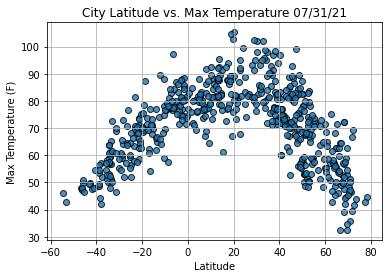

In [110]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

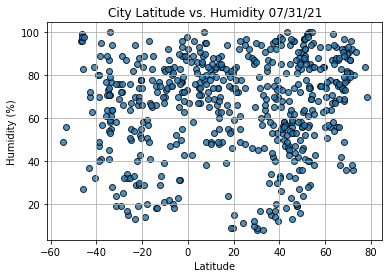

In [111]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

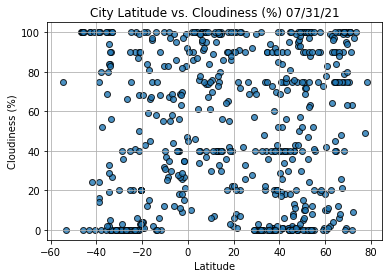

In [112]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

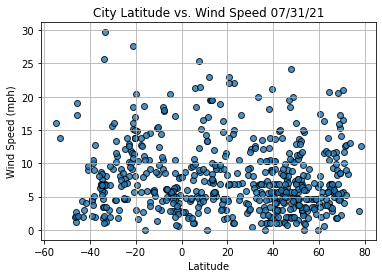

In [113]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [202]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [203]:
index13 = city_data_df.loc[13]
index13

City                       Faanui
Country                        PF
Date          2021-07-31 17:21:27
Lat                      -16.4833
Lng                       -151.75
Max Temp                    77.14
Humidity                       67
Cloudiness                     66
Wind Speed                  18.57
Name: 13, dtype: object

In [204]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
559     True
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [205]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2021-07-31 17:21:22,66.3167,-179.1667,32.56,75,100,9.31
1,Albany,US,2021-07-31 17:19:23,42.6001,-73.9662,72.36,47,18,1.01
2,Salalah,OM,2021-07-31 17:21:23,17.0151,54.0924,77.09,94,90,9.22
6,Bethel,US,2021-07-31 17:21:25,41.3712,-73.4140,74.89,55,1,6.91
8,Hofn,IS,2021-07-31 17:21:26,64.2539,-15.2082,48.56,87,45,10.51
...,...,...,...,...,...,...,...,...,...
559,Simao,CN,2021-07-31 17:26:01,22.7886,100.9748,67.77,96,100,1.10
560,Qianan,CN,2021-07-31 17:26:02,44.9932,124.0581,72.07,97,100,4.97
561,Benghazi,LY,2021-07-31 17:26:02,32.1167,20.0667,85.41,60,0,12.28
562,Atagay,RU,2021-07-31 17:26:03,55.1033,99.3875,57.56,84,100,1.74


In [206]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2021-07-31 17:21:22,66.3167,-179.1667,32.56,75,100,9.31
1,Albany,US,2021-07-31 17:19:23,42.6001,-73.9662,72.36,47,18,1.01
2,Salalah,OM,2021-07-31 17:21:23,17.0151,54.0924,77.09,94,90,9.22
6,Bethel,US,2021-07-31 17:21:25,41.3712,-73.4140,74.89,55,1,6.91
8,Hofn,IS,2021-07-31 17:21:26,64.2539,-15.2082,48.56,87,45,10.51


In [207]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

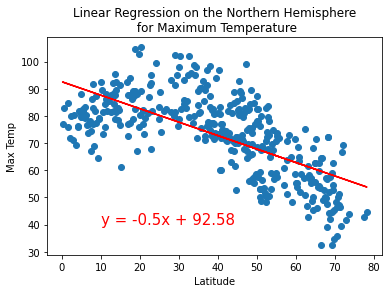

In [208]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))


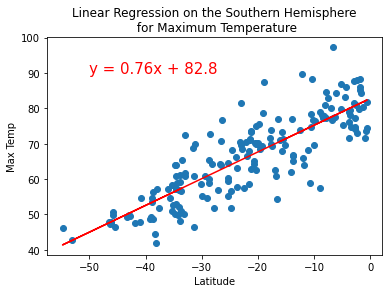

In [209]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))


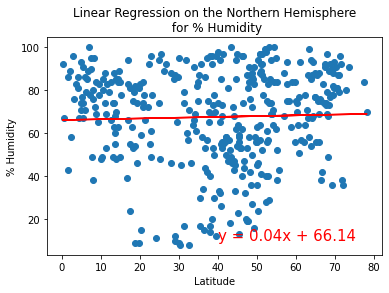

In [210]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for % Humidity', 
                       '% Humidity',(40,10))

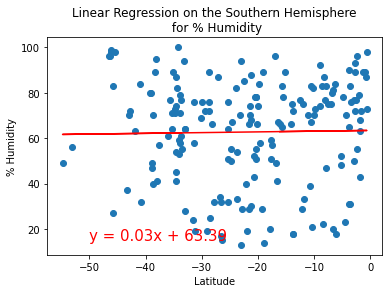

In [211]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))


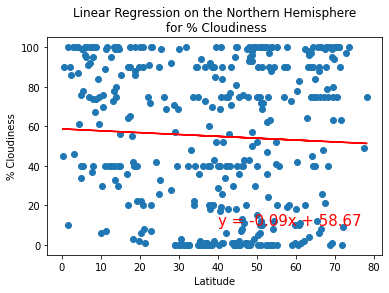

In [212]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(40,10))

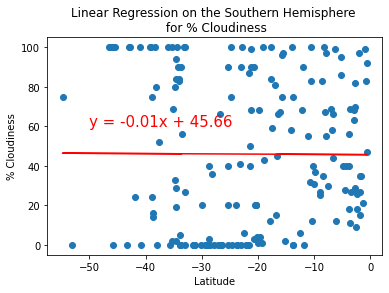

In [213]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

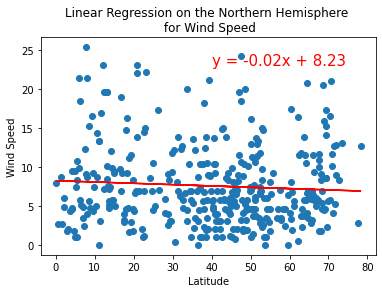

In [218]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,23))

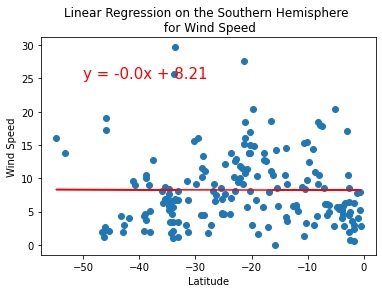

In [219]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))